<h1><center>Darwin Supervised Classification Model Building </center></h1>

Prior to getting started, there are a few things you want to do:
1. Set the dataset path.
2. Enter your username and password to ensure that you're able to log in successfully

Once you're up and running, here are a few things to be mindful of:
1. For every run, look up the job status (i.e. requested, failed, running, completed) and wait for job to complete before proceeding. 
2. If you're not satisfied with your model and think that Darwin can do better by exploring a larger search space, use the resume function.

## Import libraries

In [2]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import classification_report

from amb_sdk.sdk import DarwinSdk

## Setup

**Login to Darwin**<br>
Enter your registered username and password below to login to Darwin.

In [3]:
# Login
ds = DarwinSdk()
ds.set_url('https://amb-trial-api.sparkcognition.com/v1/')
status, msg = ds.auth_login_user('username', 'password')

if not status:
    print(msg)

**Data Path** <br>
In the cell below, set the path to your dataset, the default is Darwin's example datasets

In [4]:
path = '../../sets/'

## Data Upload

**Read dataset and view a file snippet**

After setting up the dataset path, the next step is to upload the dataset from your local device to the server. <br> In the cell below, you need to specify the dataset_name if you want to use your own data.

In [5]:
dataset_name = 'cancer_train.csv'
df = pd.read_csv(os.path.join(path, dataset_name))
df.head()

,Code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,BENIGN
1,1002945,5,4,4,5,7,10,3,2,1,BENIGN
2,1015425,3,1,1,1,2,2,3,1,1,BENIGN
3,1016277,6,8,8,1,3,4,3,7,1,BENIGN
4,1017023,4,1,1,3,2,1,3,1,1,BENIGN


**Upload dataset to Darwin**

In [ ]:
# Upload dataset
status, dataset = ds.upload_dataset(os.path.join(path, dataset_name))
if not status:
    print(dataset)

## Create and Train Model 

We will now build a model that will learn the class labels in the target column.<br> In the default cancer dataset, the target column is "Diagnosis". <br> You will have to specify your own target name for your custom dataset. <br> You can also increase max_train_time for longer training.


In [7]:
target = "Diagnosis"
model = target + "_model0"
status, job_id = ds.create_model(dataset_names = dataset_name, \
                                 target = target, \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Taken', 'starttime': '2018-10-22T14:40:48.659041', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['cancer_train.csv'], 'artifact_names': None, 'model_name': 'Diagnosis_model0', 'job_error': None}
{'status': 'Running', 'starttime': '2018-10-22T14:40:48.659041', 'endtime': None, 'percent_complete': 8, 'job_type': 'TrainModel', 'loss': 0.41640815138816833, 'generations': 7, 'dataset_names': ['cancer_train.csv'], 'artifact_names': None, 'model_name': 'Diagnosis_model0', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T14:40:48.659041', 'endtime': None, 'percent_complete': 20, 'job_type': 'TrainModel', 'loss': 0.41640815138816833, 'generations': 10, 'dataset_names': ['cancer_train.csv'], 'artifact_names': None, 'model_name': 'Diagnosis_model0', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T14:40:48.659041', 'endtime': None, 'percent_complete': 29, 'job_type': 'TrainModel', 'loss

## Extra Training (Optional)
Run the following cell for extra training, no need to specify parameters

In [8]:
# Train some more
status, job_id = ds.resume_training_model(dataset_names = dataset_name,
                                          model_name = model,
                                          max_train_time = '00:05')
                                          
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Taken', 'starttime': '2018-10-22T14:43:05.355741', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.1206773892045021, 'generations': 25, 'dataset_names': ['cancer_train.csv'], 'artifact_names': None, 'model_name': 'Diagnosis_model0', 'job_error': None}
{'status': 'Running', 'starttime': '2018-10-22T14:43:05.355741', 'endtime': None, 'percent_complete': 2, 'job_type': 'UpdateModel', 'loss': 0.1206773892045021, 'generations': 34, 'dataset_names': ['cancer_train.csv'], 'artifact_names': None, 'model_name': 'Diagnosis_model0', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T14:43:05.355741', 'endtime': None, 'percent_complete': 6, 'job_type': 'UpdateModel', 'loss': 0.1206773892045021, 'generations': 36, 'dataset_names': ['cancer_train.csv'], 'artifact_names': None, 'model_name': 'Diagnosis_model0', 'job_error': ''}
{'status': 'Running', 'starttime': '2018-10-22T14:43:05.355741', 'endtime': None, 'percent_complete': 11, 'job_type': 'Up

## Analyze Model
Analyze model provides feature importance ranked by the model. <br> It indicates a general view of which features pose a bigger impact on the model

In [9]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2018-10-22T14:48:22.87383', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.11497455090284348, 'generations': 82, 'dataset_names': None, 'artifact_names': ['30fb8e6f087b414da68ec39cf594f2e0'], 'model_name': 'Diagnosis_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2018-10-22T14:48:22.87383', 'endtime': '2018-10-22T14:48:24.324178', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.11497455090284348, 'generations': 82, 'dataset_names': None, 'artifact_names': ['30fb8e6f087b414da68ec39cf594f2e0'], 'model_name': 'Diagnosis_model0', 'job_error': ''}


Show the 10 most important features of the model.

In [10]:
feature_importance[:10]

 Single Epithelial Cell Size = 2    0.122353
Code                                0.087059
 Bare Nuclei = 1                    0.087059
 Clump Thickness = 10               0.058824
 Bare Nuclei = 10                   0.047059
 Bland Chromatin = 2                0.047059
 Uniformity of Cell Shape = 4       0.044706
 Uniformity of Cell Size = 10       0.042353
 Clump Thickness = 8                0.037647
 Marginal Adhesion = 4              0.032941
dtype: float64

## Predictions
**Perform model prediction on the the training dataset.**

In [11]:
status, artifact = ds.run_model(dataset_name, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2018-10-22T14:48:40.588206', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.11497455090284348, 'generations': 82, 'dataset_names': ['cancer_train.csv'], 'artifact_names': ['65b425c8a63548bf81c2359bd2ebc794'], 'model_name': 'Diagnosis_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2018-10-22T14:48:40.588206', 'endtime': '2018-10-22T14:48:41.876886', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.11497455090284348, 'generations': 82, 'dataset_names': ['cancer_train.csv'], 'artifact_names': ['65b425c8a63548bf81c2359bd2ebc794'], 'model_name': 'Diagnosis_model0', 'job_error': ''}


(True, 'Job completed')

Download predictions from Darwin's server.

In [12]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

,Diagnosis,prob_BENIGN,prob_MALIGNANT
0,BENIGN,0.999826,0.000174
1,MALIGNANT,0.075809,0.924191
2,BENIGN,0.999826,0.000174
3,MALIGNANT,0.075805,0.924195
4,BENIGN,0.999826,0.000174


Create plots comparing predictions with actual target

              precision    recall  f1-score   support

      BENIGN       1.00      0.97      0.98       379
   MALIGNANT       0.95      1.00      0.97       220

   micro avg       0.98      0.98      0.98       599
   macro avg       0.97      0.98      0.98       599
weighted avg       0.98      0.98      0.98       599



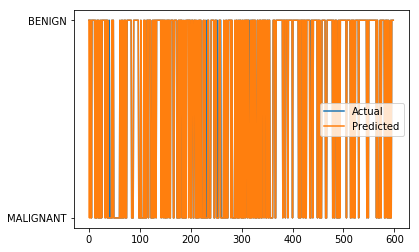

In [13]:
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

**Perform model prediction on a test dataset that wasn't used in training.** <br>
Upload test dataset

In [ ]:
test_data = 'cancer_test.csv'
status, dataset = ds.upload_dataset(os.path.join(path, test_data))
if not status:
    print(dataset)

Run model on test dataset.

In [15]:
status, artifact = ds.run_model(test_data, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2018-10-22T14:48:58.487502', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.11497455090284348, 'generations': 82, 'dataset_names': ['cancer_test.csv'], 'artifact_names': ['93ef5f506fd040538e96754ba5128a67'], 'model_name': 'Diagnosis_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2018-10-22T14:48:58.487502', 'endtime': '2018-10-22T14:49:00.46879', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.11497455090284348, 'generations': 82, 'dataset_names': ['cancer_test.csv'], 'artifact_names': ['93ef5f506fd040538e96754ba5128a67'], 'model_name': 'Diagnosis_model0', 'job_error': ''}


(True, 'Job completed')

Create plots comparing predictions with actual target

              precision    recall  f1-score   support

      BENIGN       1.00      0.96      0.98        79
   MALIGNANT       0.88      1.00      0.93        21

   micro avg       0.97      0.97      0.97       100
   macro avg       0.94      0.98      0.96       100
weighted avg       0.97      0.97      0.97       100



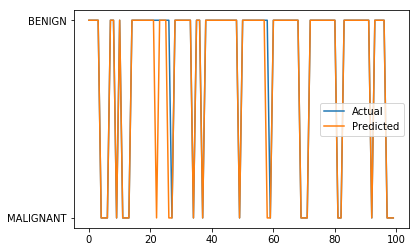

In [16]:
# Create plots comparing predictions with actual target
status, prediction = ds.download_artifact(artifact['artifact_name'])
df = pd.read_csv(os.path.join(path,test_data))
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

## Find out which machine learning model did Darwin use:

In [17]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

layer 1: Linear(in_features=82, out_features=22, bias=True, dropout=0.50, activation=gauss)
layer 2: Linear(in_features=22, out_features=76, bias=True, dropout=0.50, activation=sigmoid)
layer 3: Linear(in_features=76, out_features=155, bias=True, dropout=0.50, activation=sigmoid)
layer 4: Linear(in_features=155, out_features=100, bias=True, dropout=0.50, activation=sigmoid)
layer 5: Linear(in_features=100, out_features=43, bias=True, dropout=0.50, activation=tanh)
layer 6: Linear(in_features=43, out_features=95, bias=True, dropout=0.50, activation=tanh)
layer 7: Linear(in_features=95, out_features=114, bias=True, dropout=0.50, activation=relu)
layer 8: Linear(in_features=114, out_features=93, bias=True, dropout=0.50, activation=gauss)
layer 9: Linear(in_features=93, out_features=81, bias=True, dropout=0.50, activation=relu)
layer 10: Linear(in_features=81, out_features=79, bias=True, dropout=0.50, activation=relu)
layer 11: Linear(in_features=79, out_features=76, bias=True, dropout=0.5